<a href="https://colab.research.google.com/github/The-PhanTom999/Predicting_Heart_Disease/blob/main/Predicting_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Heart Disease

## Introduction 


According to the [World Health Organization (WHO)](https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1), approximately 17.9 million individuals die each year due to cardiovascular diseases (CVDs).

There are several risk factors that could contribute to an individual's likelihood of developing CVD, such as an unhealthy diet, lack of physical activity, or mental illnesses. Identifying these risk factors in individuals early on could potentially prevent numerous premature deaths.

The goal of this project is to create a K-Nearest Neighbors classifier that can accurately predict the likelihood of a patient developing heart disease in the future, utilizing this [Kaggle dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction). This dataset combines five different heart datasets over 11 common features, making it the most extensive heart disease dataset available for research purposes.


I'll start by importing the required libaries: 

In [ ]:
# importing libraries
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration

From the dataset documentation, it has the following features:

* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise * ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]



Let's now load the dataset

In [ ]:
# Loading dataset
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


I'm now using the info() method to find more information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


From the output above, we can see that :
* The dataset has 918 rows and 12 columns.
* 7 features in total are numerical while 5 are categorical. However, two of the numerical features, FastingBS and HeartDisease are categorical as well.
* There are no missing values in this dataset!


Focusing on the Numerical Columns, I will use Pandas `.describe()` method to view some basic statistical details about them: 

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


From the table above, we can observe that:

* The average age of patients is approximately 53 years.
* The median for Cholesterol is higher than its mean by roughly 25 mm/dl, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution.
*RestingBP and Cholesterol have a minimum value of zero.

However, a couple of observations stand out. 
* `RestingBP` is the resting blood pressure, and it's unlikely to be zero.
* As per the dataset description, Cholesterol contains the serum cholesterol values. And per the [American Heart Association](https://www.heart.org/en/health-topics/cholesterol/about-cholesterol/what-your-cholesterol-levels-mean), serum cholesterol is a composite of different measurements. Your total blood cholesterol is calculated by adding your HDL and LDL cholesterol levels, plus 20% of your triglyceride level. With the above information is enough to say that a 0 value for serum cholesterol is unlikely.

Next,I'll explore the categorical features, relying on visualizations to understand how the data is distributed.

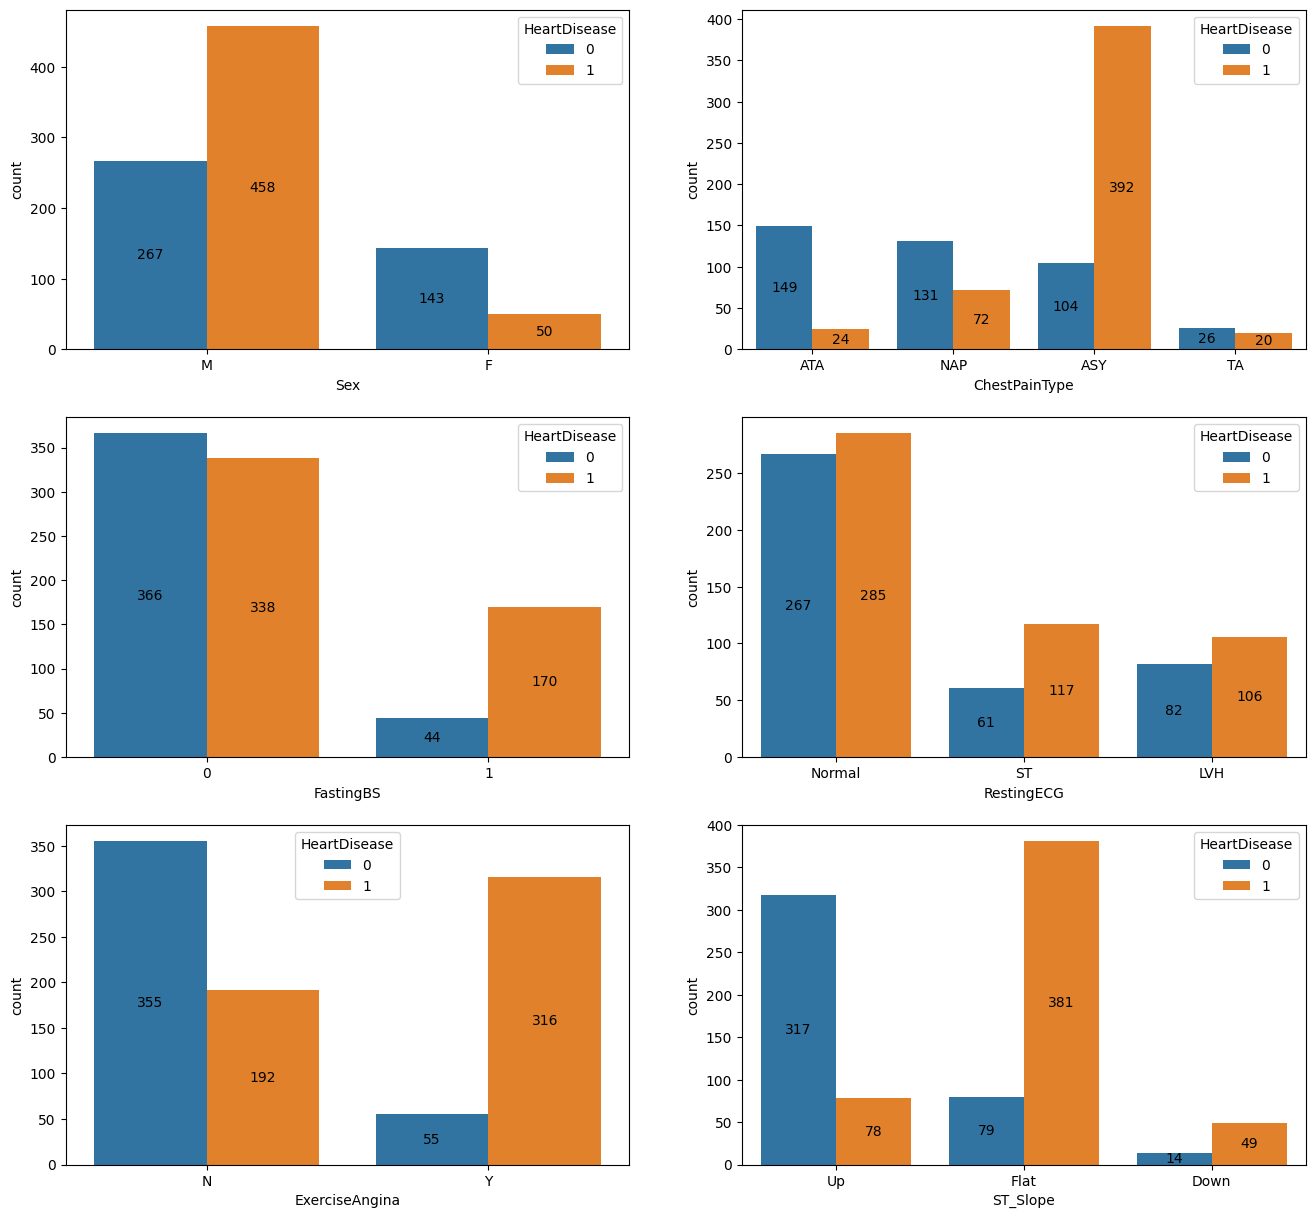

In [ ]:
categorical_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_cols[:-1]):
    ax = plt.subplot(3, 2, idx+1)
    # group by HeartDisease
    sns.countplot(x=df[col], hue=df["HeartDisease"], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

Looking at the data distribution from the above plots:
* We can further notice how skewed the dataset is towards male patients. Only 50 female patients in the dataset have been diagnosed with heart disease.
* A significant number of patients, 392, diagnosed with heart disease have asymptomatic (ASY) chest pain. While chest pain could be a relevant feature for our model, asymptomatic implies that those patients who had a heart disease did not have chest pain as a symptom.
* A high number (170) of patients with blood sugar greater than 120 mg/dl were diagnosed with heart disease in relation to those who were not diagnosed as such.
* Out of all patients who had an exercise-induced angina, 316 were diagnosed with a heart disease.
* Out of all patients with a flat ST slope, 381 were diagnosed with a heart disease.

With this, we can start to identify some features that could be relevant to us, But let's clean up the dataset a bit first before narrowing down on our features.

#Data Cleaning

As we identified earlier, there are no missing values, but a couple of columns have 0 values that don't make sense.
Lets look at how many zero values RestingBP and Cholesterol contain and decide how to handle those.

In [ ]:
df[df["RestingBP"] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [ ]:
 df[df["Cholesterol"] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


`RestingBP` has only one zero value so we will be removing that row from consideration.
However, there are 172 zero values for `Cholesterol` that's a relatively high number and we can't remove them all, so we will be replacing those values with the median. This might not be an ideal approach, but that's what we will go for now.

In [ ]:
# only keep non-zero values for RestingBP
df_clean = df.copy()[df["RestingBP"] != 0]

In [ ]:
def cleaner(x):
    if round(x,1)==0:
      x= df_clean["Cholesterol"].median()
    else:
      pass
    return x

In [ ]:
cholesterol_clean = df_clean["Cholesterol"].apply(cleaner)
df["Cholesterol"]= cholesterol_clean


In [ ]:
df_clean[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,199.016358,132.540894
std,109.246330,17.999749
min,0.000000,80.000000
25%,174.000000,120.000000
50%,223.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


The minimum values for both have changed! 
There are no more zero values in either of those. 


# Feauture Selection
Now that we've cleaned our data, we can now start selecting features for our model.

Thanks to our EDA and a general understanding of the features, we can identify some of the features that we could start with:

* Age
* Sex
* ChestPainType
* Cholesterol
* FastingBS

In order to do that, we will first convert our categorical columns into dummy variables and also identify how strongly the feature columns are correlated to the target colummn. That should help us narrow down on the features.

In [ ]:
df_clean = pd.get_dummies(df_clean, drop_first=True)
df_clean.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


<Axes: >

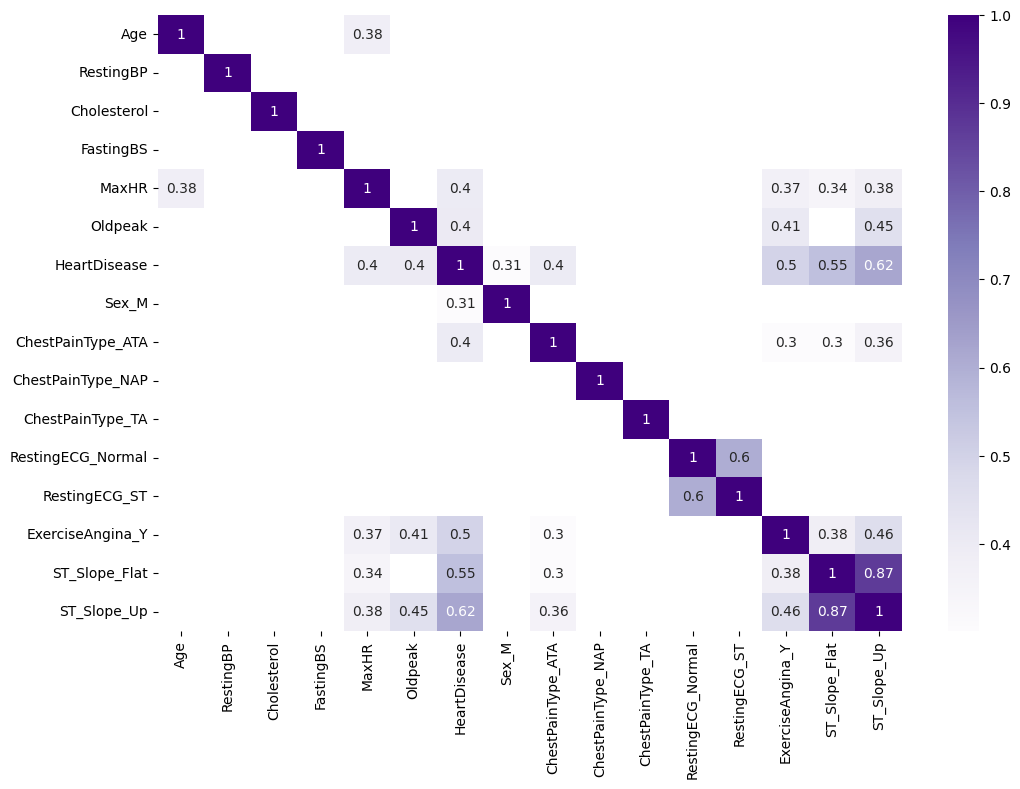

In [ ]:
correlations = abs(df_clean.corr())
plt.figure(figsize=(12,8))
sns.heatmap(correlations[correlations > 0.3], annot=True, cmap="Purples")

From our correlation heatmap, we can identify the following features to be positively correlated (correlation coefficient greater than 0.3) to HeartDisease:

* `Oldpeak`
* `MaxHR`
* `ChestPainType_ATA`
* `ExerciseAngina_Y`
* `ST_Slope_Flat`
* `ST_Slope_Up`

The correlation between cholesterol and heart disease is weaker than anticipated, so we may want to consider excluding this feature temporarily. 
Taking into account our previous endeavors, we can narrow down our features to the following:

* `Oldpeak`
* `Sex_M`
* `ExerciseAngina_Y`
* `ST_Slope_Flat`
* `ST_Slope_Up`

Time to create our model using these features!

# Building a Classifier with One Feature

We will split our dataset into a training and a test set first.

In [ ]:
X = df_clean.drop(["HeartDisease"], axis=1)
y = df_clean["HeartDisease"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state = 417)

features = [
    "Oldpeak",
    "Sex_M",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

Our initial step will be to generate a model for each of the features above and assess their performance using accuracy as a measure.

In [ ]:
for feature in features:
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train[[feature]], y_train)
    accuracy = knn.score(X_val[[feature]], y_val)
    print(f"The k-NN classifier trained on {feature} and with k = 3 has an accuracy of {accuracy*100:.2f}%")

The k-NN classifier trained on Oldpeak and with k = 3 has an accuracy of 76.81%
The k-NN classifier trained on Sex_M and with k = 3 has an accuracy of 44.93%
The k-NN classifier trained on ExerciseAngina_Y and with k = 3 has an accuracy of 73.19%
The k-NN classifier trained on ST_Slope_Flat and with k = 3 has an accuracy of 81.88%
The k-NN classifier trained on ST_Slope_Up and with k = 3 has an accuracy of 84.06%


The model that performed the best, achieving an accuracy of approximately 82%, was trained on the `ST_Slope_Flat` feature, with `ExerciseAngina_Y` coming in a close second. These choices align with the observed data distributions.

As the next step, we'll develop a model using all of these features.

# Building a Classifier with Multiple Features

In order to train on all the features mentioned earlier, it's necessary to normalize the data first. To achieve this, we'll be utilizing scikit-learn's `MinMaxScaler` to rescale the values between 0 and 1. Afterwards, we'll train the model.

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.fit_transform(X_val[features])

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_val_scaled, y_val)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 68.84


Although not an improvement, the accuracy of the model reduced to around 69%. It's not ideal, but it's a promising start.<br> Next, we'll investigate which parameters/hyperparameters may be optimal.

# Hyperparameter Tuning

To explore the optimal hyperparameters, we'll employ grid search. The following range of values will be examined for a couple of hyperparameters:

* For k (n_neighbors in scikit-learn), values from 1 to 20 will be considered.
* We'll be using two distance metrics - minkowski and manhattan.

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_test_scaled = scaler.fit_transform(X_val[features])
y_test = y_val

grid_params = {"n_neighbors": range(1, 20),
                "metric": ["minkowski", "manhattan"],
              }

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring= 'accuracy' )
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy')

In [ ]:
knn_grid.best_score_*100, knn_grid.best_params_

(83.56327543424318, {'metric': 'minkowski', 'n_neighbors': 19})

Our top-performing model attained an accuracy of around 83% utilizing 19 n_neighbors and minkowski as the distance metric. The accuracy of this model has significantly improved. 

We will evaluate our model on our test set now.

# Model Evaluation on Test Set

In [ ]:
accuracy = knn_grid.best_estimator_.score(X_test_scaled, y_test)
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 85.51


The model achieved an accuracy of approximately 86%, which is fantastic! <br> This implies that the model is highly likely to accurately predict whether a patient is at risk of developing heart disease around 86% of the time.